# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

/Users/johnfcampbell/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Step 2: Read in your data set 

In [2]:
#Read in data from source 
#df_raw = pd.read_csv("../assets/admissions.csv")
df_raw = pd.read_csv("admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [3]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

#### Question 2. Create a summary table

In [3]:
#function
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


In [42]:
low_gre = (df_raw['gpa'] < 2.5)
print low_gre.sum()

4


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: If we are asking about the raw STD number, there is a wider range of values for GRE, 200-800, than for GPA, 0-4. If we are talking about the relative difference as a percentage of the range (also wider for GRE), I would guess that before signing up for the GRE, students have a rough idea where their GRE will land. If it's low, chances are the student will not sit for the GRE.

#### Question 4. Drop data points with missing data


In [8]:
admissions = df_raw.dropna()
admissions.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [11]:
dropped = df_raw[~df_raw.index.isin(admissions.index)]
dropped.head(10)

,admit,gre,gpa,prestige
187,0,NaN,NaN,2.0
212,0,NaN,2.87,2.0
236,1,660.0,NaN,NaN


Answer: Only get three points in the inverse above, and the three all have missing data.

#### Question 6. Create box plots for GRE and GPA

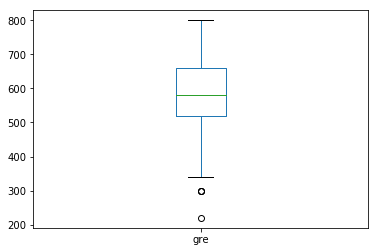

In [44]:
#boxplot 1
admissions[['gre']].plot(kind='box');


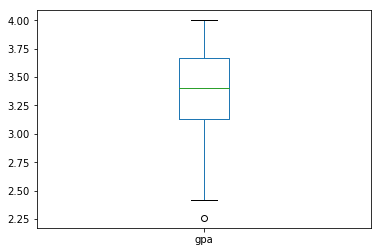

In [45]:
#boxplot 2 
admissions[['gpa']].plot(kind='box');

#### Question 7. What do this plots show?

Answer: GPA seems to be more evenly distributed.

#### Question 8. Describe each distribution 

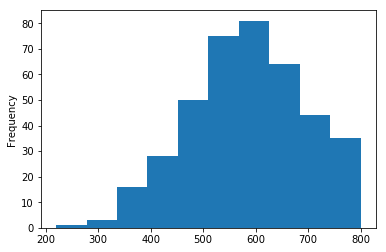

In [62]:
admissions['gre'].plot(kind='hist')

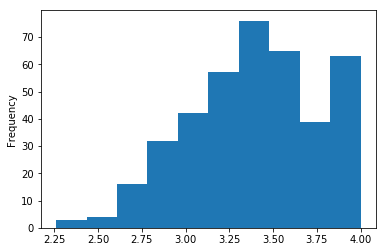

In [63]:
admissions['gpa'].plot(kind='hist')

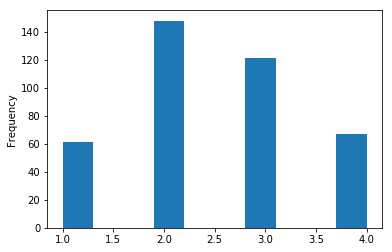

In [64]:
admissions['prestige'].plot(kind='hist')

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: No. Both GPA and GRE are skewed to the left. Prestige seems skewed to the right.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: 

#### Question 11. Which of our variables are potentially colinear? 

In [67]:
# create a correlation matrix for the data
matrix = admissions.corr(method='pearson')
matrix

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: GRE had a slightly stronger correlation to admission than GPA. But GRE and GPA were more strongly correlated to each other. Prestige had a negative correlation, as No. 1 corresponds with the highest rank. 

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: Use linear_model from statsmodel package to fit the collection of prestige scores and admissions results.

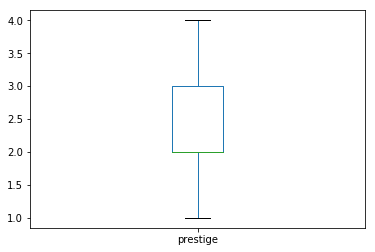

In [79]:
admissions[['prestige']].plot(kind='box')

In [80]:
import statsmodels.formula.api as smf

linear_model = smf.ols(formula='admit ~ prestige', data=admissions).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  admit   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     24.91
Date:                Tue, 08 Aug 2017   Prob (F-statistic):           9.02e-07
Time:                        15:50:22   Log-Likelihood:                -247.58
No. Observations:                 397   AIC:                             499.2
Df Residuals:                     395   BIC:                             507.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6157      0.064      9.630      0.000       0.490       0.741
prestige      -0.1199      0.024     -4.991      0.000      -0.167      -0.073
==============================================================================
Omnibus:                      289.617   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.484
Skew:                           0.718   Prob(JB):                     2.00e-13
Kurtosis:                       1.785   Cond. No.                         8.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Question 14. What is your hypothesis? 

Null hypothesis: There is no relationship between undergraduate school ranking and graduate school admission.

Alternative hypothesis: There is a significant relationship between undergraduate school ranking and graduate school admission.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data